In [29]:
%pip install pandas matplotlib prophet


Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load your dataset
df = pd.read_csv("C:\\Users\\dell\\Downloads\\daily_retail_price_Onion-upto_apr_2015.csv") 

# Show first few rows
df.head()


,Date,Centre_Name,Commodity_Name,Price
0,25-11-97,DELHI,Onion,8.0
1,25-11-97,SHIMLA,Onion,7.0
2,25-11-97,LUCKNOW,Onion,5.0
3,25-11-97,AHMEDABAD,Onion,6.0
4,25-11-97,BHOPAL,Onion,8.0


In [45]:
# Pre-process and Filter Data

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Optional: standardize column names to lowercase
df.columns = df.columns.str.strip().str.lower()

# Filter for Onion prices in Mumbai
df_onion = df[(df['commodity_name'] == 'Onion') & (df['centre_name'] == 'Mumbai')]

# Sort by date
df_onion = df_onion.sort_values('date')

# Handle missing values
df_onion['price'] = df_onion['price'].interpolate()


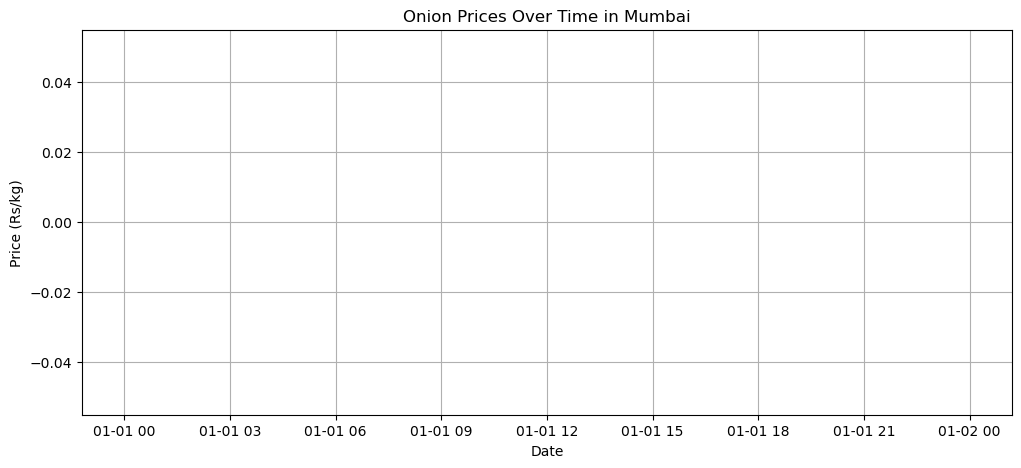

In [47]:
#Visualizing Price Trend
plt.figure(figsize=(12, 5))
plt.plot(df_onion['date'], df_onion['price'])
plt.title('Onion Prices Over Time in Mumbai')
plt.xlabel('Date')
plt.ylabel('Price (Rs/kg)')
plt.grid(True)
plt.show()

In [49]:
# Preparing Data for Prophet
# Prophet requires columns: ds (date), y (value)
df_prophet = df_onion[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

In [57]:
df_prophet = df_prophet.dropna()

In [53]:
print(df_prophet.shape)
print(df_prophet.head())

(0, 2)
Empty DataFrame
Columns: [ds, y]
Index: []


In [55]:
print(df_prophet.isnull().sum())


ds    0
y     0
dtype: int64


In [59]:
df_onion = df[(df['commodity_name'].str.strip().str.lower() == 'onion') &
              (df['centre_name'].str.strip().str.lower() == 'mumbai')]

df_onion = df_onion.sort_values('date')

# Interpolate or drop missing prices
df_onion['price'] = df_onion['price'].interpolate()

# Create Prophet dataframe
df_prophet = df_onion[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

# Drop any remaining NaNs
df_prophet = df_prophet.dropna()


In [61]:
model = Prophet()
model.fit(df_prophet)

23:07:07 - cmdstanpy - INFO - Chain [1] start processing
23:07:09 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = model.make_future_dataframe(periods=30)  # Forecast next 30 days
forecast = model.predict(future)


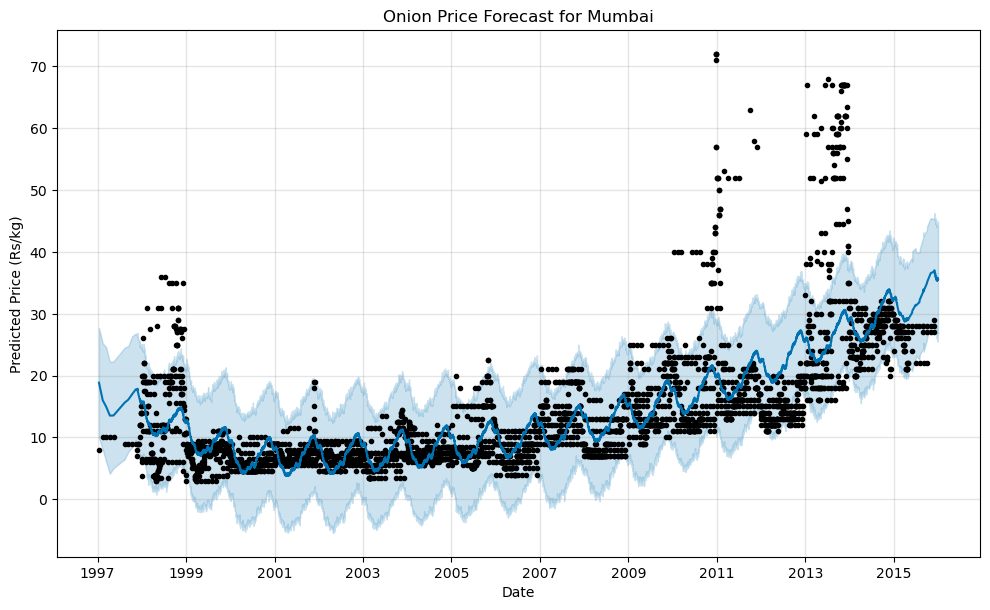

In [65]:
fig1 = model.plot(forecast)
plt.title("Onion Price Forecast for Mumbai")
plt.xlabel("Date")
plt.ylabel("Predicted Price (Rs/kg)")
plt.show()


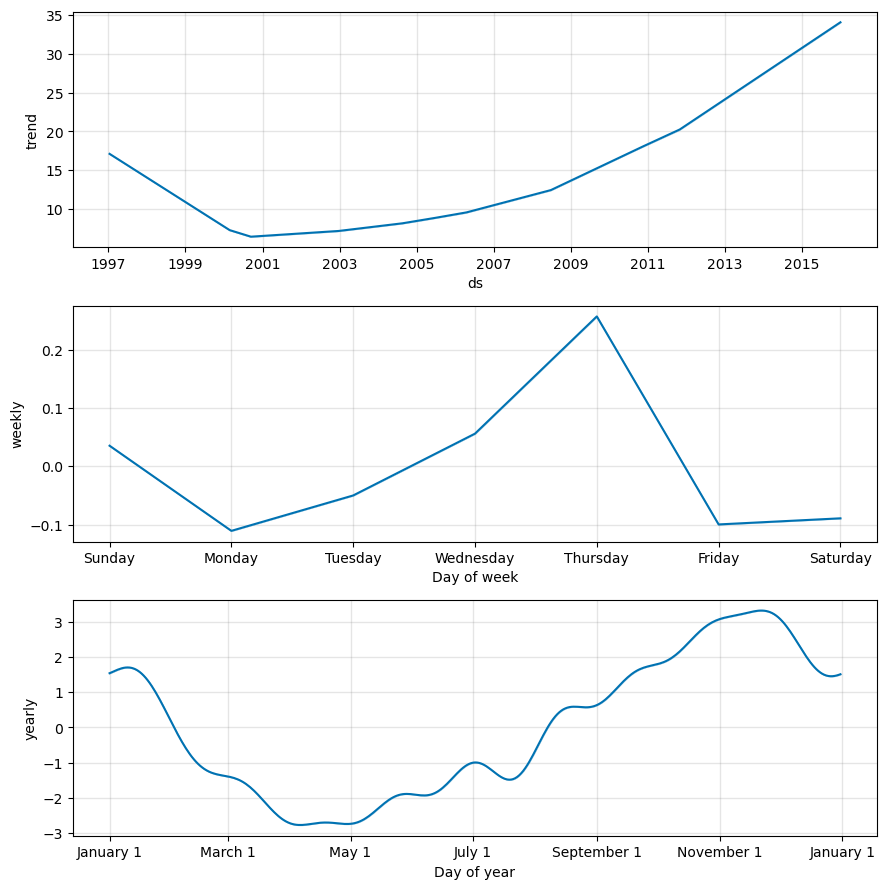

In [67]:
fig2 = model.plot_components(forecast)
plt.show()
